___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [82]:
ad_data=pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
ad_data['Ad Topic Line'].apply(lambda x:len(x.split())).nunique()

4

In [9]:
ad_data['Ad Topic Line'].apply(lambda x:len(x.split())).value_counts()

3    812
4    158
5     29
6      1
Name: Ad Topic Line, dtype: int64

In [10]:
ad_data['Ad Topic Line'].apply(lambda x:x.split()[0]).value_counts()

Front-line           20
Configurable         17
Managed              15
Pre-emptive          15
Balanced             15
                     ..
Devolved              6
Multi-lateral         5
Profit-focused        4
Re-contextualized     4
Persistent            4
Name: Ad Topic Line, Length: 100, dtype: int64

In [11]:
ad_data['Ad Topic Line'].apply(lambda x:x.split()[1]).value_counts()

zero             22
asynchronous     17
5thgeneration    16
coherent         16
intangible       16
                 ..
web-enabled       6
composite         6
needs-based       5
eco-centric       5
static            4
Name: Ad Topic Line, Length: 100, dtype: int64

In [12]:
ad_data['Ad Topic Line'].apply(lambda x:x.split()[2]).value_counts()

success            16
hierarchy          16
system             16
application        15
open               14
                   ..
process             4
product             4
functionalities     4
projection          4
matrices            3
Name: Ad Topic Line, Length: 106, dtype: int64

In [13]:
ad_data['City'].nunique()

969

In [14]:
ad_data['Country'].nunique()

237

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot:ylabel='Frequency'>

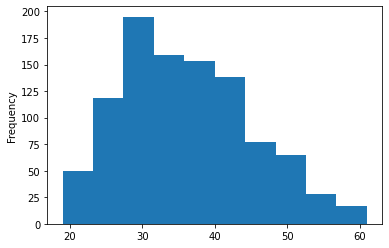

In [15]:
ad_data['Age'].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

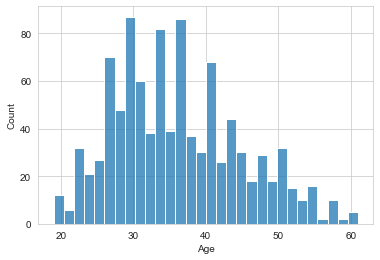

In [16]:
sns.set_style('whitegrid')
sns.histplot(ad_data['Age'],bins=30)

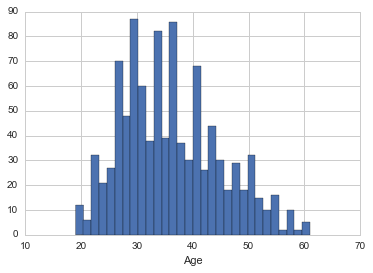

**Create a jointplot showing Area Income versus Age.**

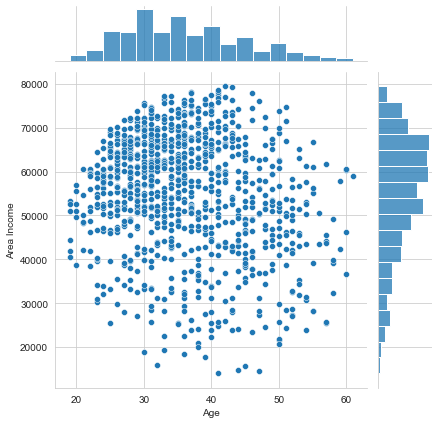

In [17]:
sns.jointplot(data=ad_data,x='Age',y='Area Income')

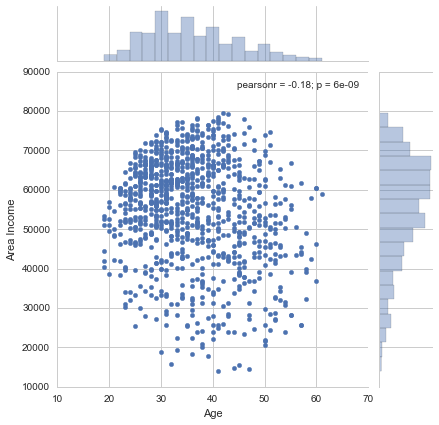

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

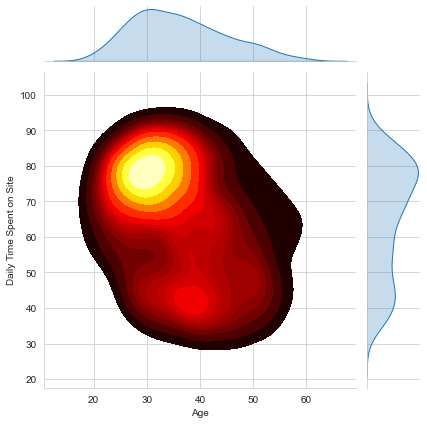

In [18]:
sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site',kind='kde',cmap='hot',fill=True,n_levels=15)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

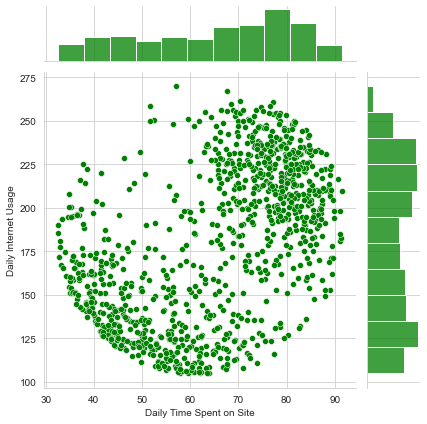

In [19]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage',color='green')

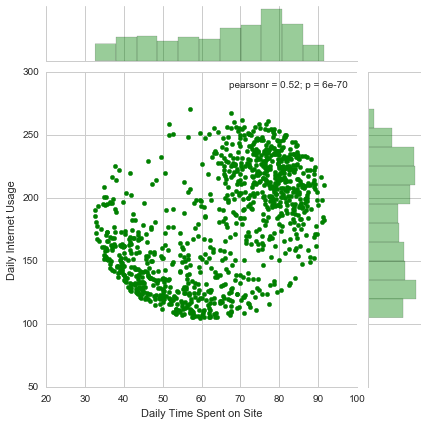

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

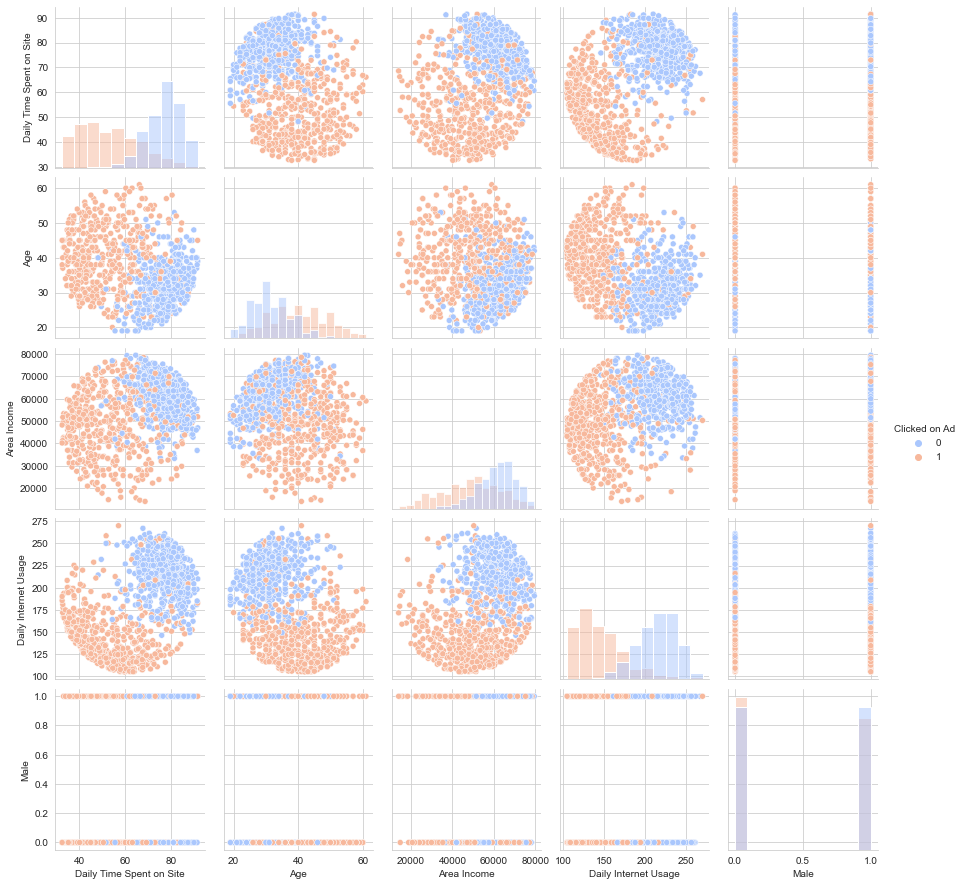

In [48]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='coolwarm',diag_kind='hist')

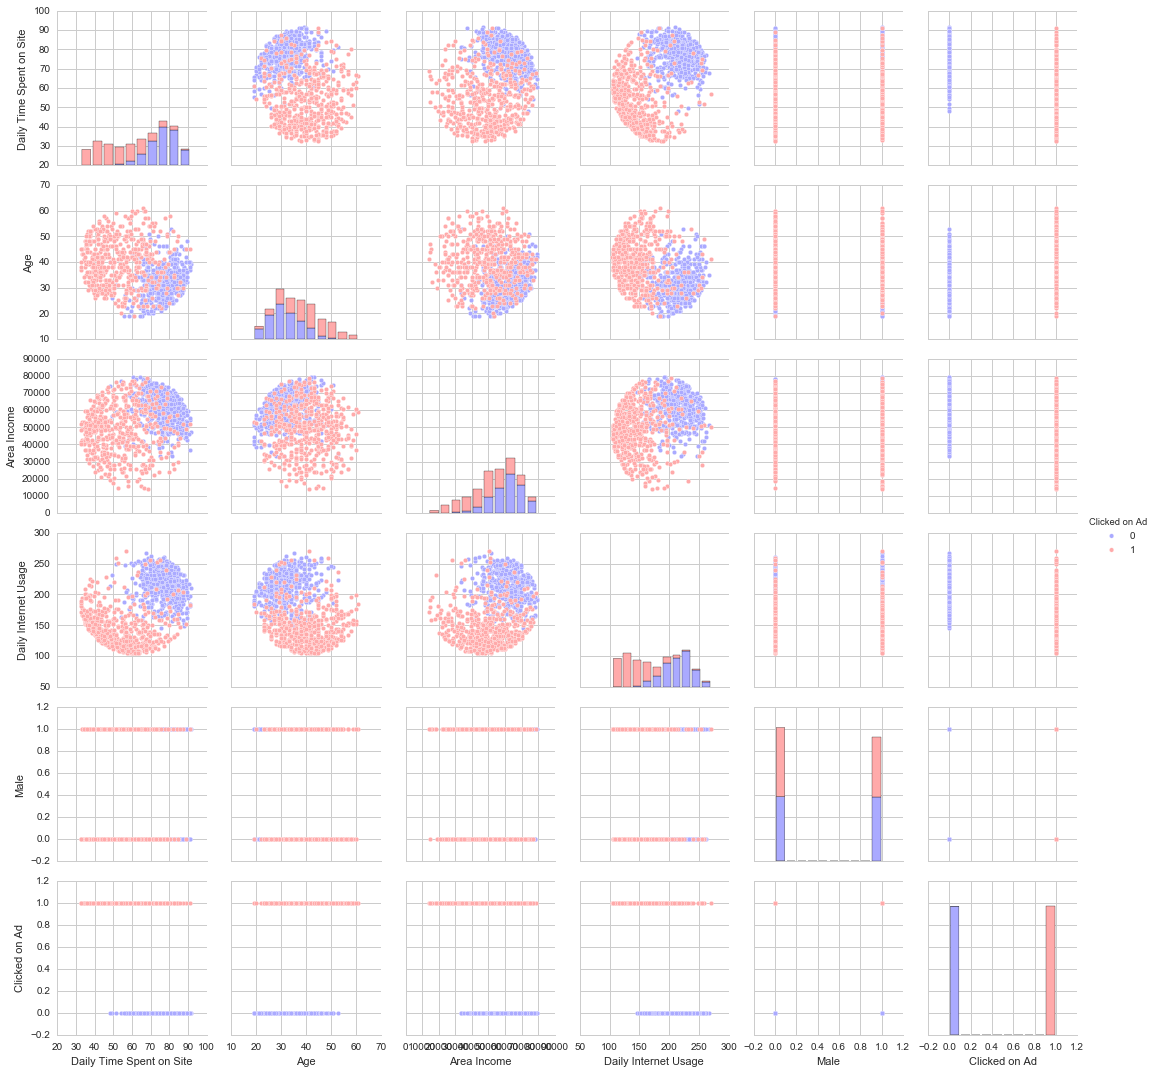

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [55]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [83]:
ad_data_eval=ad_data.drop(['Ad Topic Line', 'City', 'Country',
       'Timestamp'],axis=1)

In [84]:
X=ad_data_eval.drop('Clicked on Ad',axis=1)

In [85]:
y=ad_data_eval['Clicked on Ad']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log=LogisticRegression()

In [90]:
log.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [92]:
pred=log.predict(X_test)

** Create a classification report for the model.**

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!

In [21]:
#EXTRAs <3

ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

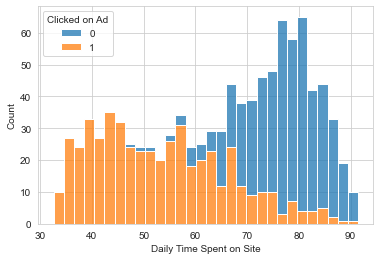

In [46]:
sns.set_style('whitegrid')
sns.histplot(data=ad_data,x='Daily Time Spent on Site',bins=30,hue='Clicked on Ad',multiple='stack')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

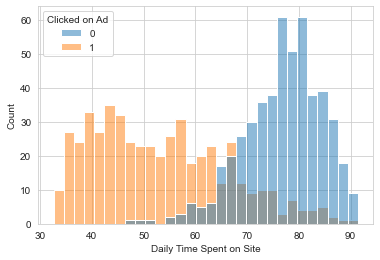

In [41]:
sns.histplot(data=ad_data,x='Daily Time Spent on Site',bins=30,hue='Clicked on Ad')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Density'>

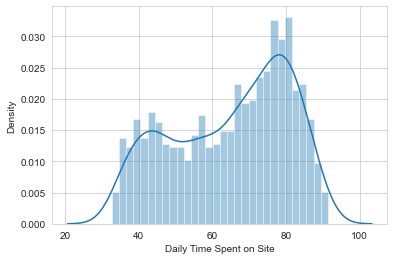

In [35]:
sns.distplot(ad_data['Daily Time Spent on Site'],bins=30)

<AxesSubplot:xlabel='Daily Time Spent on Site'>

<Figure size 432x288 with 0 Axes>

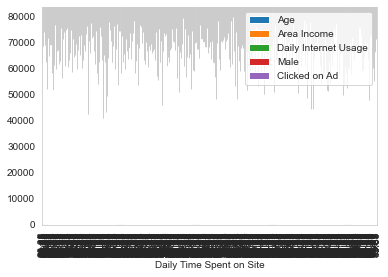

In [37]:
#barplot() not suitable for continuous data
plt.tight_layout()
ad_data.plot.bar('Daily Time Spent on Site')

In [5]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [6]:
ad_data['Timestamp']=pd.to_datetime(ad_data['Timestamp'])

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [8]:
ad_data['Timestamp'].iloc[3]

Timestamp('2016-01-10 02:31:19')

In [9]:
ad_data['Hour']=ad_data['Timestamp'].apply(lambda x:x.hour)

In [10]:
ad_data['Minute']=ad_data['Timestamp'].apply(lambda x:x.minute)

In [11]:
ad_data['Minute'].iloc[3]

31

In [12]:
ad_data['Date']=ad_data['Timestamp'].apply(lambda x:x.date())

In [13]:
ad_data['Date'].iloc[3]

datetime.date(2016, 1, 10)

In [14]:
ad_data['Day']=ad_data['Date'].apply(lambda x:x.day)

In [15]:
ad_data['Day'].iloc[3]

10

In [16]:
ad_data['Year']=ad_data['Timestamp'].apply(lambda x:x.year)

In [17]:
ad_data['Year'].iloc[3]

2016

In [18]:
ad_data['Month']=ad_data['Timestamp'].apply(lambda x:x.month)

In [19]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Minute,Date,Day,Year,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,53,2016-03-27,27,2016,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,39,2016-04-04,4,2016,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,35,2016-03-13,13,2016,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,31,2016-01-10,10,2016,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,36,2016-06-03,3,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,49,2016-02-11,11,2016,2
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,7,2016-04-22,22,2016,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,24,2016-02-01,1,2016,2
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,35,2016-03-24,24,2016,3


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

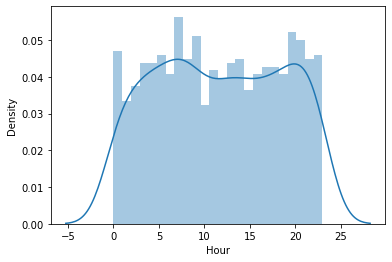

In [23]:
sns.distplot(ad_data['Hour'],bins=24)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Month', ylabel='Density'>

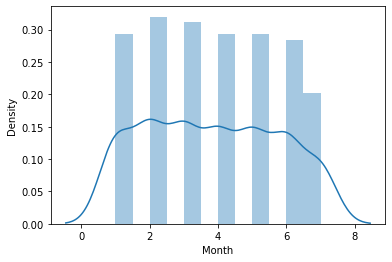

In [25]:
sns.distplot(ad_data['Month'],bins=12)

In [26]:
ad_data['Month'].value_counts()

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: Month, dtype: int64

In [27]:
ad_data['Year'].value_counts()

2016    1000
Name: Year, dtype: int64

In [28]:
ad_data['Hour'].value_counts()

7     54
20    50
9     49
21    48
0     45
23    44
5     44
22    43
14    43
8     43
4     42
13    42
3     42
17    41
18    41
11    40
19    39
6     39
16    39
12    38
2     36
15    35
1     32
10    31
Name: Hour, dtype: int64

In [29]:
ad_data['Hour'].nunique()

24

In [30]:
ad_data['Minute'].value_counts()

2     26
13    24
7     24
10    22
21    21
36    21
33    21
41    20
8     20
39    20
18    20
0     20
37    20
17    20
23    19
54    19
34    19
30    19
35    19
14    18
48    18
51    18
31    18
32    18
1     18
57    17
50    17
38    17
42    17
58    17
27    17
6     16
45    16
56    16
26    16
22    16
49    15
19    15
16    15
11    15
52    15
25    15
15    15
4     14
53    14
55    14
12    14
46    14
43    14
59    14
24    13
28    13
47    13
5     13
40    13
20    12
44    11
9     10
29     9
3      6
Name: Minute, dtype: int64

In [31]:
ad_data['Minute'].nunique()

60

In [32]:
ad_data['Day'].nunique()
ad_data['Day'].value_counts()

3     46
17    42
15    41
10    37
26    36
4     36
16    35
23    35
5     35
27    35
18    35
8     35
9     34
20    33
24    33
14    33
1     33
11    32
7     32
21    32
28    30
13    30
29    29
12    29
19    29
30    28
2     25
6     25
22    24
25    23
31    18
Name: Day, dtype: int64

In [33]:
ad_data['Day'].nunique()

31

In [34]:
ad_data['Day of the Week']=ad_data['Timestamp'].apply(lambda x:x.dayofweek)

In [35]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Minute,Date,Day,Year,Month,Day of the Week
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,53,2016-03-27,27,2016,3,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,39,2016-04-04,4,2016,4,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,35,2016-03-13,13,2016,3,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,31,2016-01-10,10,2016,1,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,36,2016-06-03,3,2016,6,4


In [36]:
ad_data['Day of the Week'].nunique()

7

In [39]:
ad_data['Day of the Week'].value_counts()

6    159
2    156
4    155
3    142
0    140
5    126
1    122
Name: Day of the Week, dtype: int64

In [40]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Minute', 'Date', 'Day', 'Year',
       'Month', 'Day of the Week'],
      dtype='object')

In [46]:
ad_data_final=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male','Clicked on Ad', 'Hour',
       'Month', 'Day of the Week']]

In [47]:
ad_data_final

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Month,Day of the Week
0,68.95,35,61833.90,256.09,0,0,0,3,6
1,80.23,31,68441.85,193.77,1,0,1,4,0
2,69.47,26,59785.94,236.50,0,0,20,3,6
3,74.15,29,54806.18,245.89,1,0,2,1,6
4,68.37,35,73889.99,225.58,0,0,3,6,4
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,21,2,3
996,51.30,45,67782.17,134.42,1,1,2,4,4
997,51.63,51,42415.72,120.37,1,1,17,2,0
998,55.55,19,41920.79,187.95,0,0,2,3,3


In [48]:
ad_data_final.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Month,Day of the Week
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117,0.000895,-0.010920,0.018336
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531,-0.049905,0.023689,0.013593
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255,0.034573,-0.050216,0.013879
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539,0.074347,0.017530,0.009035
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027,0.058552,0.005220,-0.038861
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000,-0.047431,0.016095,0.002003
Hour,0.000895,-0.049905,0.034573,0.074347,0.058552,-0.047431,1.000000,-0.013748,0.007034
Month,-0.010920,0.023689,-0.050216,0.017530,0.005220,0.016095,-0.013748,1.000000,-0.020090
Day of the Week,0.018336,0.013593,0.013879,0.009035,-0.038861,0.002003,0.007034,-0.020090,1.000000


In [49]:
# CONCLUSION (  Hour, Month and Day of week ) has almost ZERO correlaion with 'CLicked on Ad'

In [62]:
Check=ad_data_final.pivot_table(values='Clicked on Ad', index='Hour',columns='Age',aggfunc='sum')
Check

Age,19,20,21,22,23,24,25,26,27,28,...,52,53,54,55,56,57,58,59,60,61
Hour,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,0.0,0.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,...,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Age', ylabel='Hour'>

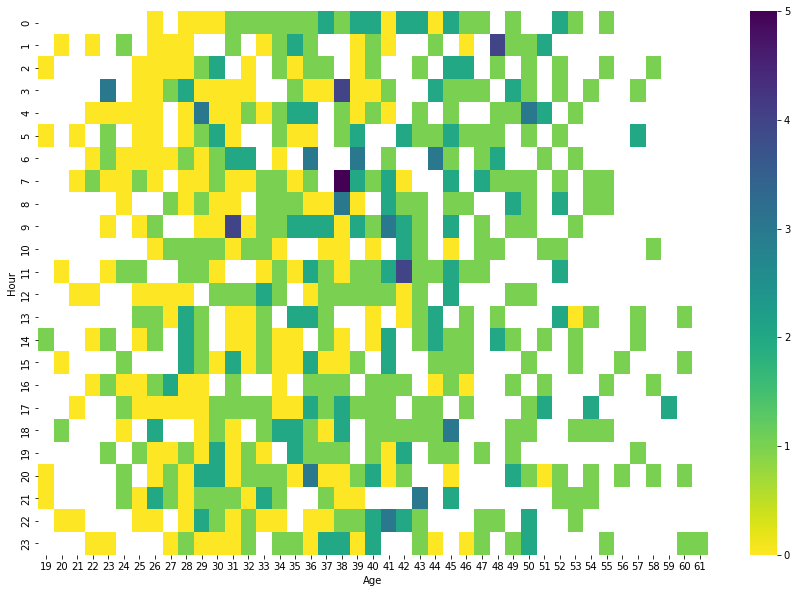

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(Check,cmap='viridis_r')

In [69]:
Check.fillna(0,inplace=True)

In [70]:
Check

Age,19,20,21,22,23,24,25,26,27,28,...,52,53,54,55,56,57,58,59,60,61
Hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1080x720 with 0 Axes>

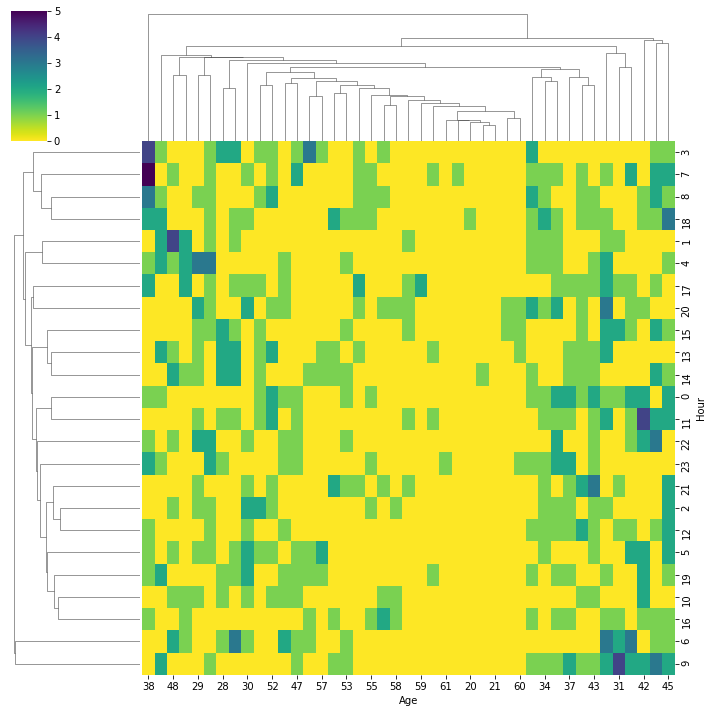

In [71]:
plt.figure(figsize=(15,10))
sns.clustermap(Check,cmap='viridis_r')

<AxesSubplot:xlabel='Age', ylabel='Hour'>

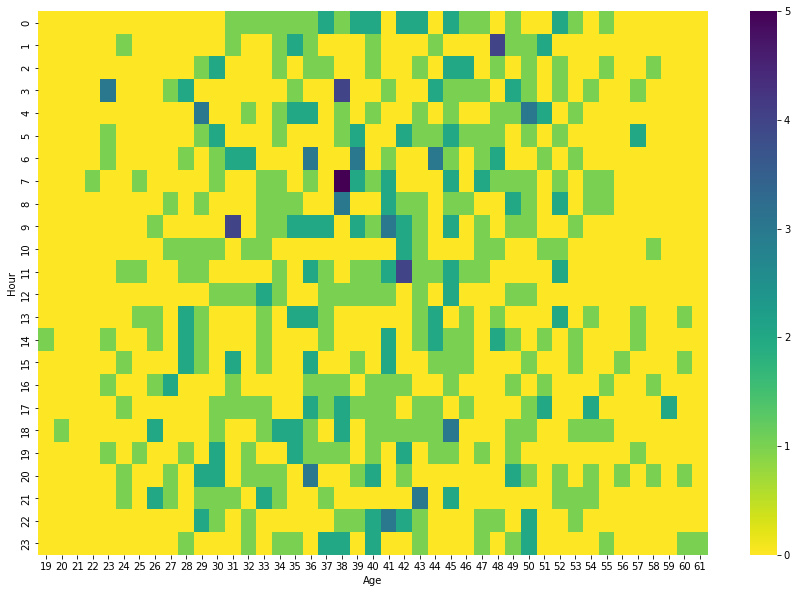

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(Check,cmap='viridis_r')

In [73]:
# No discernable clustering w.r.t Hour of usage

In [95]:
from sklearn.metrics import confusion_matrix

In [110]:
print(confusion_matrix(y_test,pred))

[[170   1]
 [  5 154]]


In [111]:
log.coef_

array([[-1.50385974e-01,  1.34885139e-01, -9.70991548e-05,
        -5.82407884e-02,  1.37824619e+00]])

In [97]:
# Trying Linear Regression on Logistical problem
from sklearn.linear_model import LinearRegression

In [98]:
lm=LinearRegression()

In [99]:
lm.fit(X_train,y_train)

LinearRegression()

In [113]:
lm.coef_

array([-1.24057962e-02,  8.30893676e-03, -5.85055609e-06, -5.53032004e-03,
       -2.40963213e-02])

In [103]:
X_train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [104]:
predict=lm.predict(X_test)

In [105]:
from sklearn import metrics

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Density'>

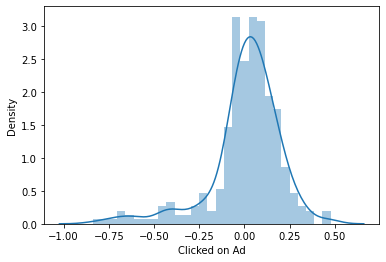

In [106]:
sns.distplot(predict-y_test)

<AxesSubplot:ylabel='Count'>

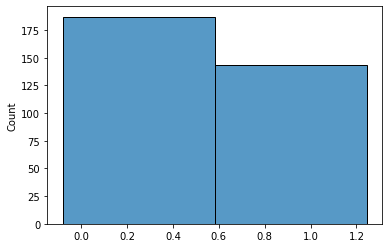

In [109]:
sns.histplot(predict,bins=2)

In [114]:
ad_data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000
